## Logistic Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sklearn.linear_model as lm
import sklearn.metrics as metric

import warnings
warnings.filterwarnings("ignore", message="Line Search failed")
warnings.filterwarnings("ignore", message="The line search algorithm did not converge")

In [2]:
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data)*test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [3]:
df = pd.read_csv("datasets/lr_data.csv")
df = df.drop(columns="Unnamed: 0")
# df_train = df.iloc[0:1500]
# df_test = df.iloc[1500:]
df_train, df_test = split_train_test(df, 0.2)
print(df.shape)
print(df_train.shape)
print(df_test.shape)
df.head()

(1890, 6)
(1512, 6)
(378, 6)


,is_booked,tmv,demand_supply_ratio,price,category_grouped,month
0,0,14569,1.902318,30.0,1,5
1,1,4201,14.622831,39.0,0,5
2,1,5724,8.659708,24.0,1,4
3,1,39102,13.570390,121.0,2,12
4,0,9666,1.297453,42.0,1,8


In [4]:
X_train = df_train[["tmv", "demand_supply_ratio", "price", "category_grouped", "month"]]
y_train = df_train["is_booked"]
X_test = df_test[["tmv", "demand_supply_ratio", "price", "category_grouped", "month"]]
y_test = df_test["is_booked"]

model = lm.LogisticRegression(solver='newton-cg').fit(X_train, y_train)


## mean accuracy on the given dataset

In [5]:
print("mean Accuracy on train set: {0}".format(model.score(X_train, y_train)))
print("mean Accuracy on test set: {0}".format(model.score(X_test, y_test)))

mean Accuracy on train set: 0.6984126984126984
mean Accuracy on test set: 0.7116402116402116


## Predict class labels for samples in X.

In [6]:
l_pred = list(model.predict(X_test))
l_gt = list(y_test)
metric.confusion_matrix(l_gt, l_pred)

array([[117,  69],
       [ 40, 152]])

#### Let's try cross validation based accuracy

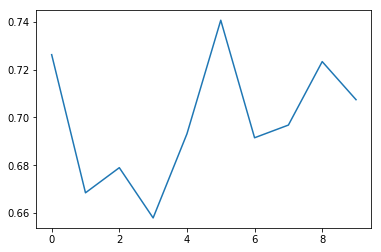

In [8]:
from sklearn.model_selection import cross_val_score

scores= cross_val_score(model, X=df[["tmv", "demand_supply_ratio", "price", "category_grouped", "month"]],\
                y=df["is_booked"], cv=10, scoring="accuracy")
plt.plot(range(10), scores)
plt.show()

#### Plot precision-recall curve

In [41]:
y_scores = model.decision_function(X_train)

In [42]:
y_scores

array([-0.32941111,  0.51266136,  0.26619895, ..., -0.186395  ,
        1.33955586, -0.65541308])

In [43]:
from sklearn.metrics import precision_recall_curve

p, r, t = precision_recall_curve(y_train, y_scores)

# Plot the curve
def plot_precision_recall_vs_threshold(p, r, t):
    plt.figure(figsize=(10,6))
    plt.plot(t, p[:-1], "b--", label="Precision")
    plt.plot(t, r[:-1], "g-", label="Recall")
    plt.xlabel("Thershold")
    plt.legend(loc="center right")
    plt.ylim([0,1])
    plt.grid()

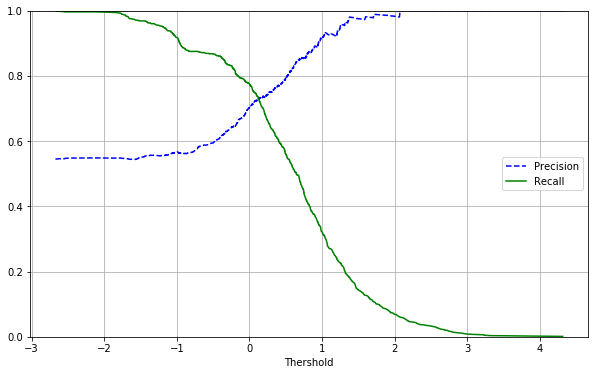

In [44]:
plot_precision_recall_vs_threshold(p, r, t)

I can select some threshold of 0.25 instead of 0, which is the default value 

### ROC CUrve

In [55]:
from sklearn.metrics import roc_curve

fpr, tpr, threshold = roc_curve(y_train, y_scores)

def plot_roc_curve(fpr, tpr):
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, linewidth=2)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.title("ROC Curve")
    plt.xlabel("FPR")
    plt.ylabel("TPR")

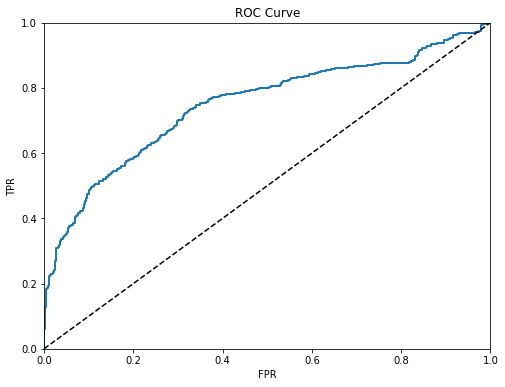

In [56]:
plot_roc_curve(fpr, tpr)